In [ ]:
# Initialize the Phemex exchange API
exchange = ccxt.phemex()

# Define the parameters for the OHLCV data
symbol = 'BTCUSD'
timeframe = '1h'
limit = 1000

# Get the OHLCV data from the exchange
ohlcv_raw = exchange.fetch_ohlcv(symbol=symbol, timeframe=timeframe, limit=limit)

# Convert the OHLCV data to a numpy array
ohlcv = np.array(ohlcv_raw)

# Assume `ohlcv` is a numpy array with shape (n_candles, 5) containing the OHLCV data
open = ohlcv[:, 0]
high = ohlcv[:, 1]
low = ohlcv[:, 2]
close = ohlcv[:, 4]

# Calculate the harmonic pattern using TA-Lib
pattern = talib.CDLHARAMI(open, high, low, close)

# Plot the candlestick chart with the harmonic pattern overlaid
fig, ax = plt.subplots()
ax.plot(close)
ax2 = ax.twinx()
ax2.plot(pattern, color='red')

# Convert the plot to an image and save it
fig.canvas.draw()
image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
plt.savefig('harmonic_patterns/image.png', dpi=300)

# Preprocess the image and prepare it for input to the CNN RNN model
image = preprocess_image('harmonic_patterns/image.png')

# Generate training data
X_train = []
y_train = []
X_test = []
y_test = []

for i in range(limit):
    # Get the OHLCV data for the current candle
    candle_ohlcv = ohlcv[i:i+100]
    
    # Calculate the harmonic pattern for the current candle
    candle_pattern = pattern[i:i+100]
    
    # Plot the candlestick chart with the harmonic pattern overlaid
    fig, ax = plt.subplots()
    ax.plot(candle_ohlcv[:, 4])
    ax2 = ax.twinx()
    ax2.plot(candle_pattern, color='red')

    # Convert the plot to an image and save it
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close()

    # Preprocess the image and prepare it for input to the CNN RNN model
    image = preprocess_image(image)

    # Add the preprocessed image and the label to the training or test set
    if i < limit * 0.8:
        X_train.append(image)
        y_train.append(1 if np.random.random() < 0.5 else 0)  # Randomly assign a label to the image
    else:
        X_test.append(image)
        y_test.append(1 if np.random.random() < 0.5 else 0)  # Randomly assign a label to the image

# Convert the training and test sets to numpy arrays
X_train = np.array(X_train)
y_train = np.array(to_categorical(y_train))
X_test = np.array(X_test)
y_test = np.array(to_categorical(y_test))

# Define the CNN RNN model architecture
model = create_model(input_shape=image_array.shape, num_classes=10)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(TimeDistributed(LSTM(64)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the preprocessed images
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


In [1]:
import numpy as np
import talib
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, TimeDistributed
from tensorflow.keras.utils import to_categorical

def preprocess_image(image_path):
    # Load the image using PIL
    image = Image.open(image_path)
    
    # Resize the image to 100x100 pixels
    image = image.resize((100, 100))
    
    # Convert the image to a numpy array
    image_array = np.array(image)
    
    # Normalize the pixel values to be between 0 and 1
    image_array = image_array / 255.0
    
    # Add an extra dimension to the array to represent the batch size
    image_array = np.expand_dims(image_array, axis=0)
    
    return image_array

def create_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    # model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def create_rnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(32, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(32, return_sequences=True))
    model.add(TimeDistributed(Dense(64, activation='relu')))
    model.add(TimeDistributed(Dense(num_classes, activation='softmax')))
    return model

# Example usage:
# image_array = preprocess_image('my_image.jpg')
# model = create_model(input_shape=image_array.shape, num_classes=10)
# rnn_model = create_rnn_model(input_shape=(10, image_array.shape[0]), num_classes=10)


ModuleNotFoundError: No module named 'tensorflow.tsl'

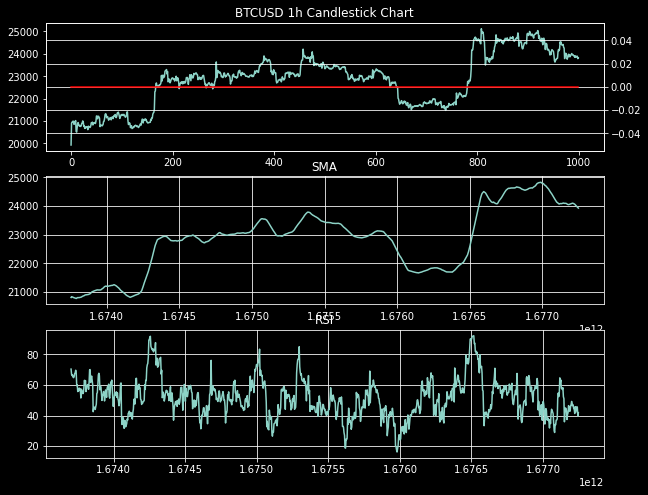

NameError: name 'preprocess_image' is not defined

In [4]:
import ccxt
import numpy as np
import talib
import matplotlib.pyplot as plt

# Define the exchange and symbol
exchange_id = 'phemex'
symbol = 'BTCUSD'
timeframe = '1h'
limit = 1000
# Create the exchange object
exchange = getattr(ccxt, exchange_id)()

# Define the timeframe and number of candles
timeframe = '1h'
num_candles = 100

# Get the OHLCV data from the exchange
ohlcv_raw = exchange.fetch_ohlcv(symbol=symbol, timeframe=timeframe, limit=limit)
timestamps = [x[0] for x in ohlcv_raw]
# Convert the OHLCV data to a numpy array
ohlcv = np.array(ohlcv_raw)

# Assume `ohlcv` is a numpy array with shape (n_candles, 5) containing the OHLCV data
opens = ohlcv[:, 0]
highs = ohlcv[:, 1]
lows = ohlcv[:, 2]
closes = ohlcv[:, 4]

# Calculate the harmonic pattern using TA-Lib
pattern = talib.CDLHARAMI(opens, highs, lows, closes)

# Plot the candlestick chart with the harmonic pattern overlaid
# fig, ax = plt.subplots()
# ax.plot(closes)
# ax2 = ax.twinx()
# ax2.plot(pattern, color='red')

# Calculate the technical indicators
sma = talib.SMA(closes)
rsi = talib.RSI(closes)
macd, macdsignal, macdhist = talib.MACD(closes)

# Create the subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Plot the candlestick chart
axs[0].plot(closes)
axs[0] = axs[0].twinx()
axs[0].set_title(symbol + ' ' + timeframe + ' Candlestick Chart')
axs[0].grid(True)
axs[0].plot(pattern, color='red')

# Plot the moving average
axs[1].set_title('SMA')
axs[1].grid(True)
axs[1].plot(timestamps, sma)

# Plot the RSI
axs[2].set_title('RSI')
axs[2].grid(True)
axs[2].plot(timestamps, rsi)

# Show the chart
plt.show()
# Convert the plot to an image and save it
fig.canvas.draw()
image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
plt.close()
# Preprocess the image and prepare it for input to the CNN RNN model
image = preprocess_image(image)
# image_array = preprocess_image('my_image.jpg')
# model = create_model(input_shape=image_array.shape, num_classes=10)
# rnn_model = create_rnn_model(input_shape=(10, image_array.shape[0]), num_classes=10)